<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/DLTensorflow/RNN/Language_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l==0.17.0

In [ ]:
import random
import tensorflow as tf
from d2l import tensorflow as d2l

In [ ]:
tokens = d2l.tokenize(d2l.read_time_machine())
corpus = [token for line in tokens for token in line]
vocab = d2l.Vocab(corpus)
vocab.token_freqs[:10]

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

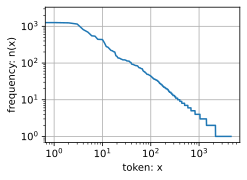

In [ ]:
freqs = [freq for token, freq in vocab.token_freqs]
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)',
         xscale='log', yscale='log')

In [17]:
print(len(corpus[:-1]))
print(len(corpus[1:]))

32774
32774


In [20]:
len(corpus)

32775

# **BIGRAM**

In [9]:
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_tokens

[('the', 'time'),
 ('time', 'machine'),
 ('machine', 'by'),
 ('by', 'h'),
 ('h', 'g'),
 ('g', 'wells'),
 ('wells', 'i'),
 ('i', 'the'),
 ('the', 'time'),
 ('time', 'traveller'),
 ('traveller', 'for'),
 ('for', 'so'),
 ('so', 'it'),
 ('it', 'will'),
 ('will', 'be'),
 ('be', 'convenient'),
 ('convenient', 'to'),
 ('to', 'speak'),
 ('speak', 'of'),
 ('of', 'him'),
 ('him', 'was'),
 ('was', 'expounding'),
 ('expounding', 'a'),
 ('a', 'recondite'),
 ('recondite', 'matter'),
 ('matter', 'to'),
 ('to', 'us'),
 ('us', 'his'),
 ('his', 'grey'),
 ('grey', 'eyes'),
 ('eyes', 'shone'),
 ('shone', 'and'),
 ('and', 'twinkled'),
 ('twinkled', 'and'),
 ('and', 'his'),
 ('his', 'usually'),
 ('usually', 'pale'),
 ('pale', 'face'),
 ('face', 'was'),
 ('was', 'flushed'),
 ('flushed', 'and'),
 ('and', 'animated'),
 ('animated', 'the'),
 ('the', 'fire'),
 ('fire', 'burned'),
 ('burned', 'brightly'),
 ('brightly', 'and'),
 ('and', 'the'),
 ('the', 'soft'),
 ('soft', 'radiance'),
 ('radiance', 'of'),
 ('of', 

In [23]:
bigram_vocab = d2l.Vocab(bigram_tokens)
bigram_vocab.token_freqs

[(('of', 'the'), 309),
 (('in', 'the'), 169),
 (('i', 'had'), 130),
 (('i', 'was'), 112),
 (('and', 'the'), 109),
 (('the', 'time'), 102),
 (('it', 'was'), 99),
 (('to', 'the'), 85),
 (('as', 'i'), 78),
 (('of', 'a'), 73),
 (('i', 'saw'), 68),
 (('i', 'could'), 67),
 (('and', 'i'), 62),
 (('in', 'a'), 61),
 (('that', 'i'), 61),
 (('time', 'traveller'), 60),
 (('for', 'the'), 51),
 (('to', 'me'), 51),
 (('into', 'the'), 49),
 (('at', 'the'), 49),
 (('from', 'the'), 47),
 (('of', 'my'), 47),
 (('upon', 'the'), 46),
 (('for', 'a'), 45),
 (('on', 'the'), 45),
 (('i', 'felt'), 45),
 (('that', 'the'), 44),
 (('was', 'a'), 44),
 (('with', 'a'), 41),
 (('said', 'the'), 40),
 (('in', 'my'), 40),
 (('time', 'machine'), 39),
 (('was', 'the'), 39),
 (('then', 'i'), 39),
 (('the', 'morlocks'), 39),
 (('seemed', 'to'), 37),
 (('to', 'be'), 36),
 (('had', 'been'), 36),
 (('the', 'same'), 36),
 (('there', 'was'), 34),
 (('out', 'of'), 34),
 (('and', 'then'), 34),
 (('by', 'the'), 32),
 (('but', 'i'), 

# **TRIGRAM**

In [24]:
trigram_tokens = [triple for triple in zip(corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab = d2l.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

[(('the', 'time', 'traveller'), 59),
 (('the', 'time', 'machine'), 30),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('it', 'was', 'a'), 15),
 (('here', 'and', 'there'), 15),
 (('seemed', 'to', 'me'), 14),
 (('i', 'did', 'not'), 14),
 (('i', 'saw', 'the'), 13),
 (('i', 'began', 'to'), 13)]

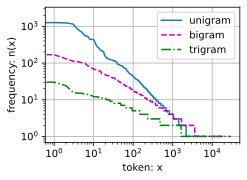

In [25]:
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',
         ylabel='frequency: n(x)', xscale='log', yscale='log',
         legend=['unigram', 'bigram', 'trigram'])